In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve, classification_report, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('./data/diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

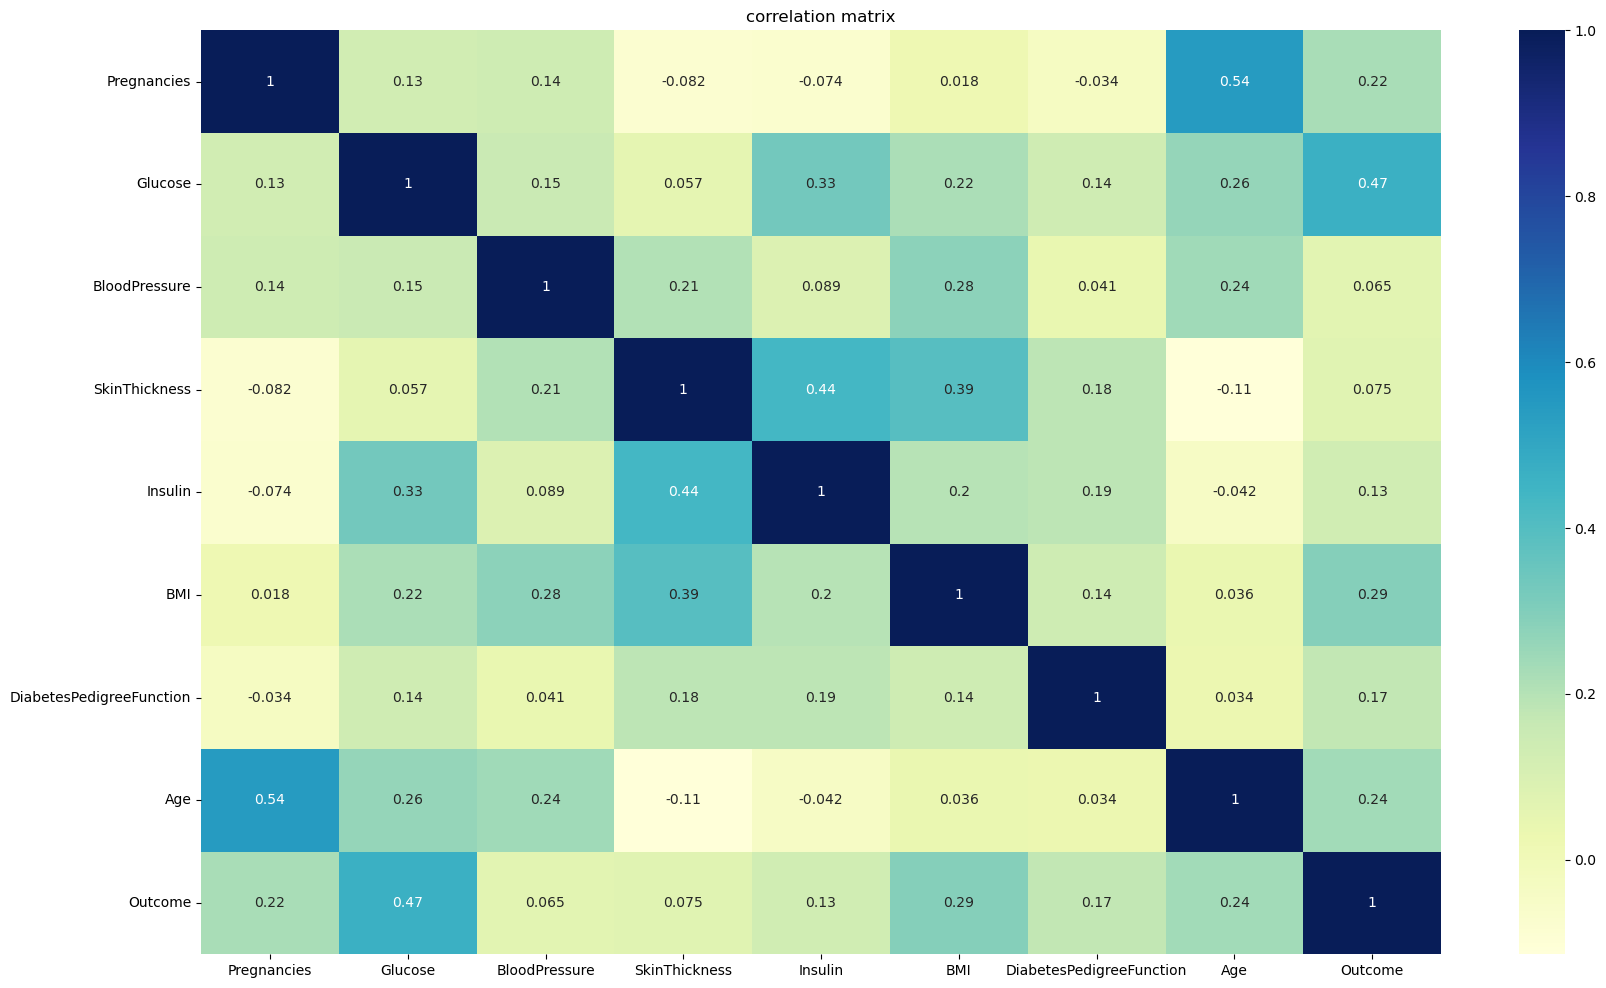

In [12]:
corr_matrix = data.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(20, 12))
ax = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
ax.set_title("correlation matrix")
plt.show()

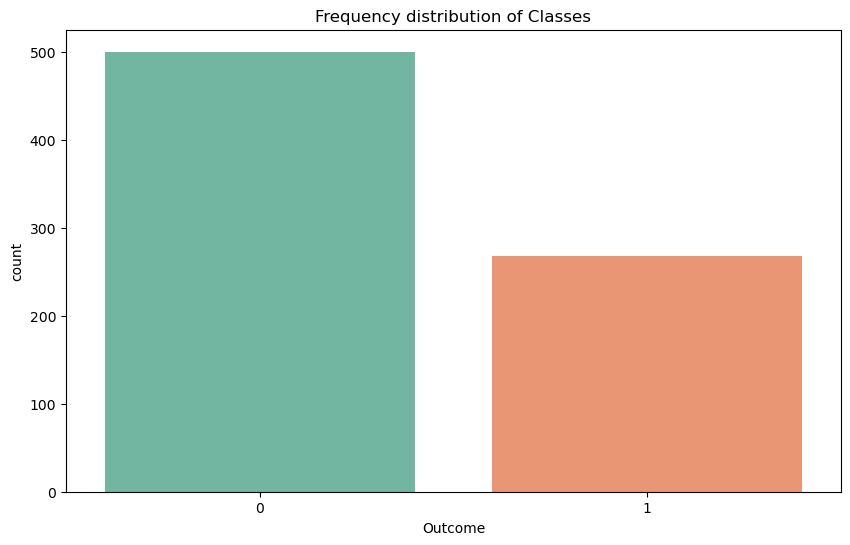

In [25]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x="Outcome", data=data, palette="Set2")
ax.set_title("Frequency distribution of Classes")
ax.set_xticklabels(data.Outcome.value_counts().index)
plt.show()

Text(0.5, 0, 'Distribution of Glucose level')

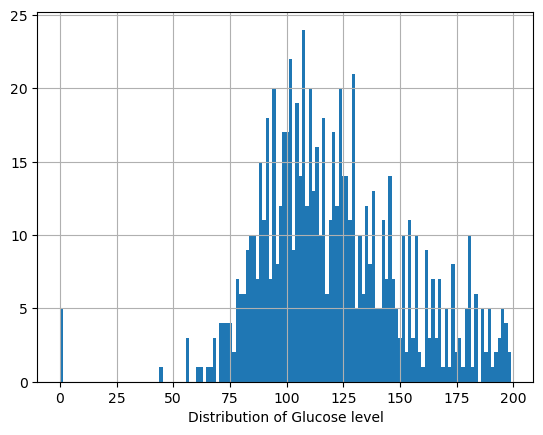

In [21]:
data.Glucose.hist(bins=data.Glucose.nunique())
plt.xlabel('Distribution of Glucose level')

<Figure size 1000x600 with 0 Axes>

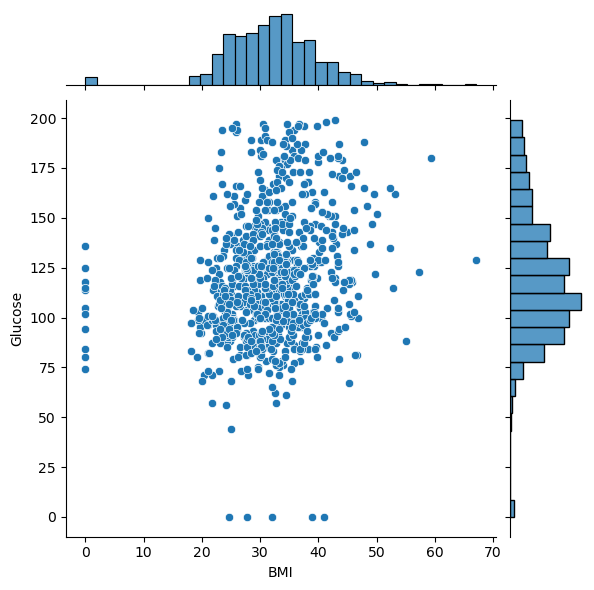

In [23]:
plt.figure(figsize=(10, 6))
sns.jointplot(x=data.BMI, y=data.Glucose)

<Figure size 1000x600 with 0 Axes>

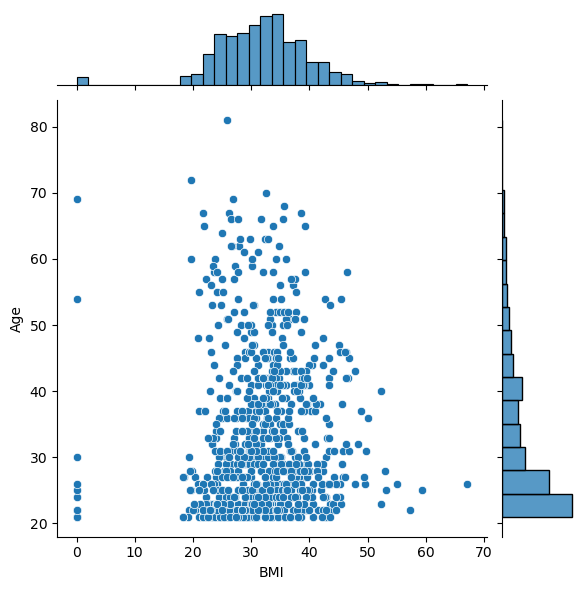

In [26]:
plt.figure(figsize=(10, 6))
sns.jointplot(x=data.BMI, y=data.Age)

In [29]:
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [31]:
def get_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [61]:
neighbors = np.arange(1,31)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

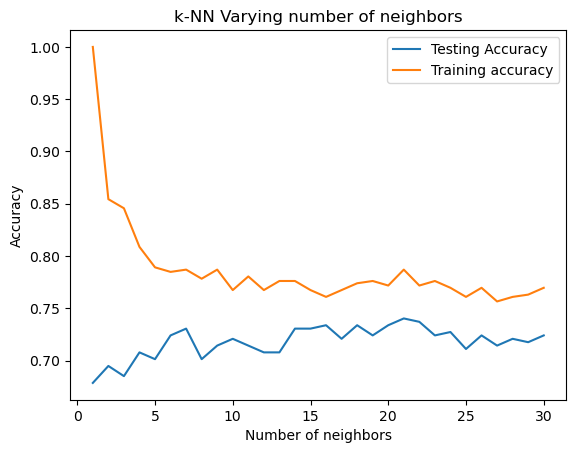

In [62]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [81]:
model = KNeighborsClassifier(n_neighbors=7)


In [82]:
model.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [83]:
model.score(X_test,y_test)


0.7305194805194806

In [84]:
y_pred = model.predict(X_test)


In [85]:
get_score(model, X_train, y_train, X_test, y_test, train=True)
get_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 78.70%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.813084    0.726619  0.786957    0.769851      0.782821
recall       0.872910    0.627329  0.786957    0.750119      0.786957
f1-score     0.841935    0.673333  0.786957    0.757634      0.782925
support    299.000000  161.000000  0.786957  460.000000    460.000000
_______________________________________________
Confusion Matrix: 
 [[261  38]
 [ 60 101]]

Test Result:
Accuracy Score: 73.05%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.778302    0.625000  0.730519    0.701651      0.725044
recall       0.820896    0.560748  0.730519    0.690822      0.730519
f1-score     0.799031    0.591133  0.730519    0.695082      0.726807
support    201.000000  107.000000  0.730519  308.000000    308.

In [86]:
y_pred_proba = model.predict_proba(X_test)[:,1]


In [87]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


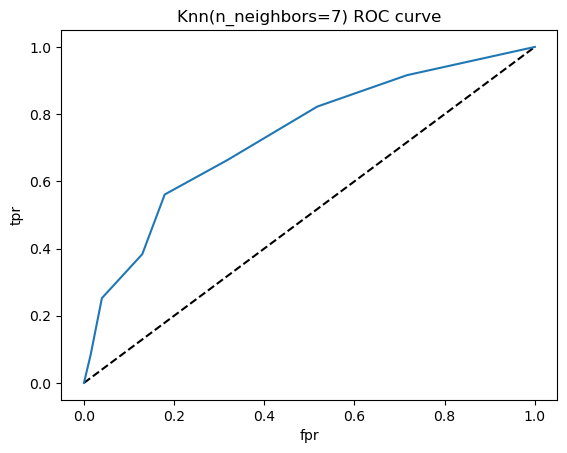

In [88]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [89]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [90]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [91]:
knn_cv.best_score_


0.7578558696205755

In [92]:
knn_cv.best_params_


{'n_neighbors': 14}